# Shashwat Jain
## Advance Computer Vision Lab - 7 
## Task 1:

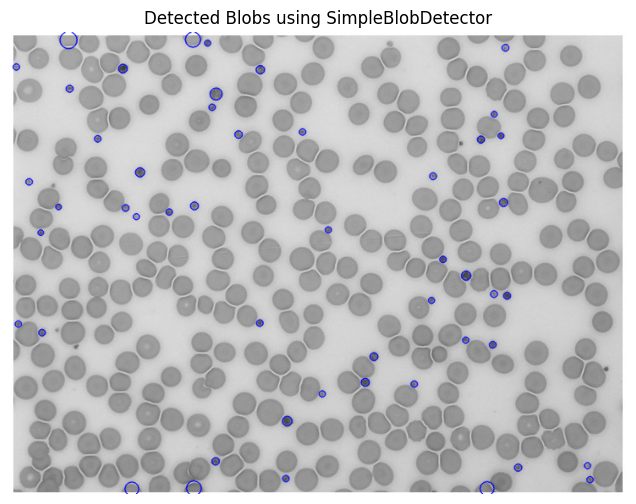

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/platelets.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


params = cv2.SimpleBlobDetector_Params()


params.filterByArea = True
params.minArea = 30
params.maxArea = 300


params.filterByCircularity = True
params.minCircularity = 0.2


params.filterByConvexity = True
params.minConvexity = 0.7


params.filterByInertia = True
params.minInertiaRatio = 0.2


detector = cv2.SimpleBlobDetector_create(params)


keypoints = detector.detect(image)


image_with_blobs = cv2.drawKeypoints(
    image, keypoints, np.array([]), (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


plt.figure(figsize=(10, 6))
plt.imshow(image_with_blobs, cmap='gray')
plt.title("Detected Blobs using SimpleBlobDetector")
plt.axis("off")
plt.show()

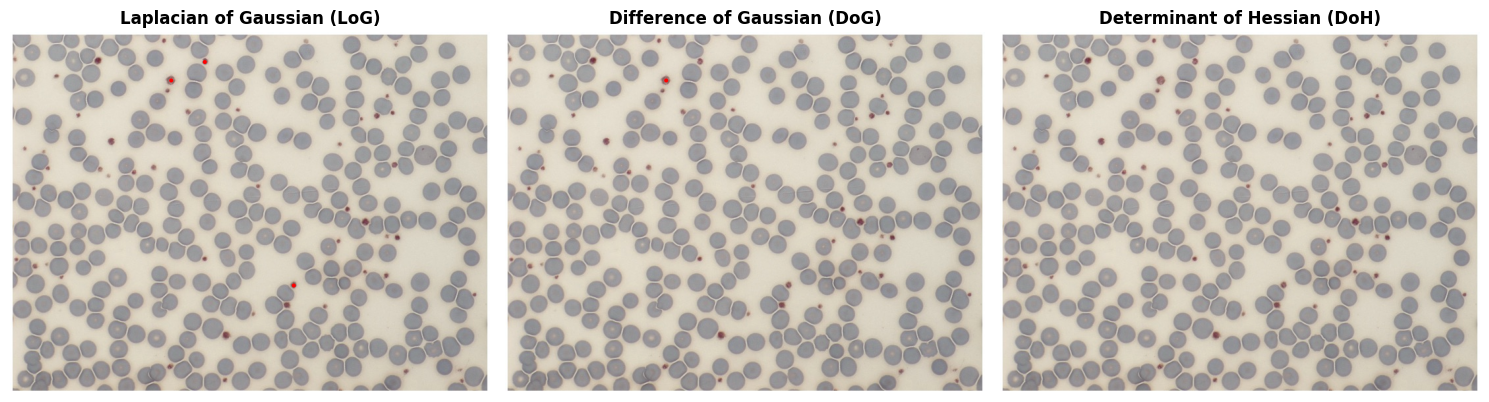

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, blob_doh
from skimage import img_as_float

# Load the image in color
image_path = "/content/platelets.jpeg"
image_color = cv2.imread(image_path)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
image_float = img_as_float(image_gray)

# Convert image to HSV for color filtering
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Define HSV range for purple platelets (fine-tune as needed)
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])

# Create a mask for purple regions
mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)

# Apply LoG (Laplacian of Gaussian)
blobs_log = blob_log(image_float, min_sigma=1, max_sigma=3, num_sigma=3, threshold=0.02, overlap=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)  # Convert std deviation to radius

# Apply DoG (Difference of Gaussian)
blobs_dog = blob_dog(image_float, min_sigma=1, max_sigma=3, sigma_ratio=1.6, threshold=0.02, overlap=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

# Apply DoH (Determinant of Hessian)
blobs_doh = blob_doh(image_float, min_sigma=1, max_sigma=3, num_sigma=3, threshold=0.01, overlap=0.1)

# Function to filter blobs based on purple mask
def filter_blobs(blobs):
    return np.array([blob for blob in blobs if mask_purple[int(blob[0]), int(blob[1])] > 0])

# Filter blobs to keep only those inside the purple mask
filtered_log = filter_blobs(blobs_log)
filtered_dog = filter_blobs(blobs_dog)
filtered_doh = filter_blobs(blobs_doh)

# Plot results side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Laplacian of Gaussian (LoG)", "Difference of Gaussian (DoG)", "Determinant of Hessian (DoH)"]
blobs_list = [filtered_log, filtered_dog, filtered_doh]

for ax, title, blobs in zip(axes, titles, blobs_list):
    ax.imshow(image_color, cmap='gray')
    for y, x, r in blobs:
        ax.add_patch(plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False))
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis("off")

plt.tight_layout()
plt.show()

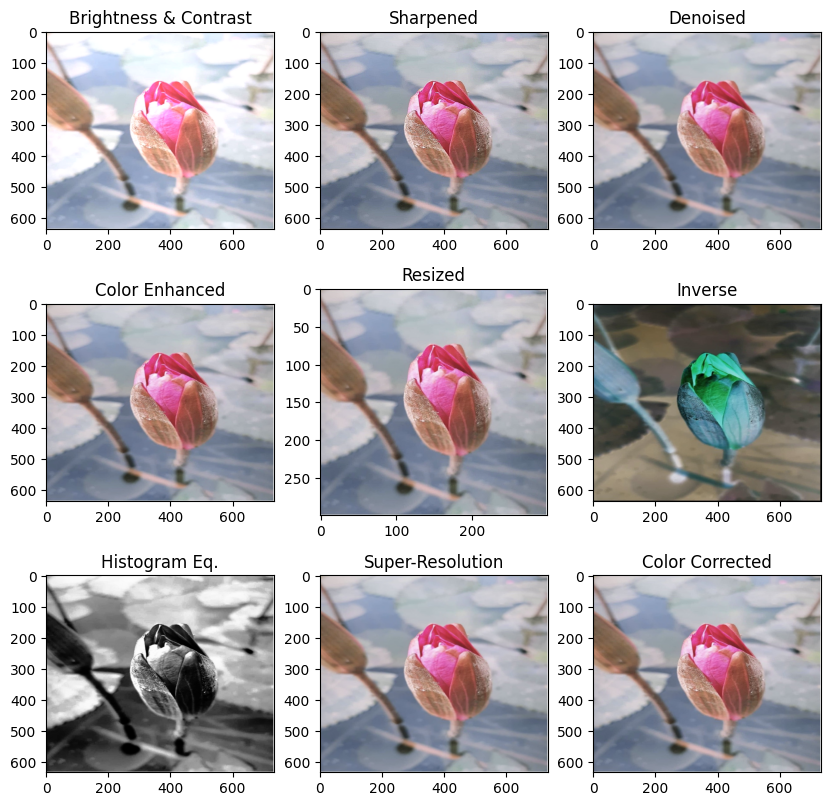

In [ ]:
import cv2
import numpy as np
from skimage.exposure import equalize_hist

filepath = "/content/flower.jpeg"
# Load Image
def load_image(filepath):
    with open(filepath, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image Enhancement Functions
def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def enhance_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

def inverse_transform(image):
    return 255 - image

def histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return equalize_hist(gray)

def super_resolution(image):
    upscaled = cv2.pyrUp(image)
    return cv2.pyrDown(upscaled)

def color_correction(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    return cv2.bitwise_and(image, image, mask=mask)

# Example Usage
if __name__ == "__main__":
    img_path = "flower.jpeg"
    image = load_image(img_path)

    bright_contrast = adjust_brightness_contrast(image)
    sharpened = sharpen_image(image)
    noise_removed = remove_noise(image)
    color_enhanced = enhance_color(image)
    resized = resize_image(image, 300, 300)
    inverse = inverse_transform(image)
    hist_eq = histogram_equalization(image)
    super_res = super_resolution(image)
    color_corrected = color_correction(image)

    # Display Results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1), plt.imshow(bright_contrast), plt.title('Brightness & Contrast')
    plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
    plt.subplot(3, 3, 3), plt.imshow(noise_removed), plt.title('Denoised')
    plt.subplot(3, 3, 4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
    plt.subplot(3, 3, 5), plt.imshow(resized), plt.title('Resized')
    plt.subplot(3, 3, 6), plt.imshow(inverse, cmap='gray'), plt.title('Inverse')
    plt.subplot(3, 3, 7), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Eq.')
    plt.subplot(3, 3, 8), plt.imshow(super_res), plt.title('Super-Resolution')
    plt.subplot(3, 3, 9), plt.imshow(color_corrected), plt.title('Color Corrected')
    plt.show()

TASK 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import time
from torchvision.models import vgg16, alexnet
from torch.utils.data import DataLoader

# Step 1: Set up the device for computation (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Step 3: Load Pretrained Models
def get_model(model_name):
    if model_name == "alexnet":  # 5 -> Conv (first 2 large filter 5,11), 3 -> FC(Softmax with 1000 classes), RElU
        model = alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    elif model_name == "vgg16":  # 13 Conv + 3 FC, 3X3(kernel), 2x2 pooling, Softmax with 1000 classes), RElU
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    model = model.to(device)
    return model

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    end_time = time.time()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%, Inference Time: {end_time - start_time:.2f}s")
    return accuracy, end_time - start_time

# Train and Evaluate AlexNet
alexnet_model = get_model("alexnet")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)
train_model(alexnet_model, train_loader, criterion, optimizer, epochs=5)
alexnet_acc, alexnet_time = evaluate_model(alexnet_model, test_loader)

# Train and Evaluate VGG16
vgg16_model = get_model("vgg16")
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)
train_model(vgg16_model, train_loader, criterion, optimizer, epochs=5)
vgg16_acc, vgg16_time = evaluate_model(vgg16_model, test_loader)

# Compare Results
print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Time: {alexnet_time:.2f}s")
print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Time: {vgg16_time:.2f}s")


100%|██████████| 169M/169M [00:05<00:00, 32.6MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNe

Epoch 1, Loss: 4.2208
Epoch 2, Loss: 3.6843
Epoch 3, Loss: 3.3293
Epoch 4, Loss: 3.0762
Epoch 5, Loss: 2.9030
Accuracy: 29.38%, Inference Time: 17.63s


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 96.6MB/s]


Epoch 1, Loss: 4.3326
Epoch 2, Loss: 3.7960
Epoch 3, Loss: 3.5303
Epoch 4, Loss: 3.3216
Epoch 5, Loss: 3.1274
Accuracy: 25.50%, Inference Time: 51.32s
AlexNet - Accuracy: 29.38%, Time: 17.63s
VGG16 - Accuracy: 25.50%, Time: 51.32s
